In [88]:
import numpy as np
%pylab inline
from matplotlib import pyplot as plt
import csv

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['nan']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [93]:
def polynomial(x,y,m):
    n=len(x)
    A=np.zeros((m+1,m+1))
    B=np.zeros((m+1,1))

    for i in range(m+1):
        B[i,0]= sum((x**i)*y)
        for j in range(m+1):
            if i == j == 0 :
                A[i,j]=n
            else:
                A[i,j]=sum(x**(i+j))
    
    c=np.linalg.inv(A)@B # find  sol （ 找出矩陣 Ax=B 的 x ）
    # c ＝ 高斯法 guass(A,B)
    return c # 回傳係數

def func(u,w):
    x=0
    for i in range(len(w)):
        x+=w[i]*u**i
    return x

def plt_fig(x,y):
    n=3
    w=polynomial(x,y,n) #n次方多項式
    x_temp=np.linspace(0,80,100)
    plt.plot(x_temp,func(x_temp,w),'r')   
    plt.scatter(x,y) 
    plt.show

def coef(x,y):
    x_av=np.mean(x)
    y_av=np.mean(y)
    to=0; bo1=0; bo2=0; 
    for i in range(len(x)) :
        to += (x[i]-x_av)*(y[i]-y_av)
        bo1 += (x[i]-x_av)**2
        bo2 += (y[i]-y_av)**2
    r=to / np.sqrt(bo1*bo2) 
    return r

In [89]:
with open('Cycle1RAD_Tmp.csv', newline='') as csvfile:
# 讀取 CSV 檔案內容
        rows = csv.reader(csvfile)
        data = list(rows)
    

In [90]:
len(data)

58414

In [91]:
length = int((len(data)))
tmp =np.zeros((length))
R1 =np.zeros((length))
R2 =np.zeros((length))
for i in range(len(data)):
    tmp[i] =   data[i][0]
    R1[i] =    data[i][1]
    R2[i] =    data[i][2]

In [92]:
tem_ = np.arange(int(min(tmp)), int(max(tmp)))
temperature = []
R1_avg = []
R2_avg = []
i = 0
nan = np.float64('nan')
for j in range(len(tem_)):
    data1=[]
    data2=[]
    while(tmp[i] == tem_[j]):
        data1 = np.append(data1, R1[i])
        data2 = np.append(data2, R2[i])
        i+=1
    dataR1=np.mean(data1)
    dataR2=np.mean(data2)
    # print(dataR1)
    if (np.isnan(dataR1) == False):
        temperature = np.append(temperature, tem_[j])
        R1_avg = np.append(R1_avg, dataR1)
        R2_avg = np.append(R2_avg,dataR2)


In [102]:
print(f'R1 averg = {np.mean(R1_avg)} V')
print(f'R2 averg = {np.mean(R2_avg)} V')
print(f'R1 median = {np.median(R1_avg)} V')
print(f'R2 median = {np.median(R2_avg)} V')
print(f'R1 standard = {np.std(R1_avg)} V')
print(f'R2 standard = {np.std(R2_avg)} V')

R1_avg = 1.4017964042183109 V
R2_avg = 1.3537467499719553 V
R1 median = 1.4020179871760177 V
R2 median = 1.3537271821944488 V
R1 standard = 0.00040912061145023714 V
R2 standard = 0.00016585819586281277 V


In [106]:
R1_min = np.mean(R1_avg)-3*np.std(R1_avg)
R1_max = np.mean(R1_avg)+3*np.std(R1_avg)
print(R1_min)
print(R1_max)

1.40056904238396
1.4030237660526617


In [114]:
R1_min = np.mean(R1_avg)-3*np.std(R1_avg)
R1_max = np.mean(R1_avg)+3*np.std(R1_avg)
R2_min = np.mean(R2_avg)-3*np.std(R2_avg)
R2_max = np.mean(R2_avg)+3*np.std(R2_avg)
j=0
temR1_filter = []
R1_filter = []
R2_filter = []
temR2_filter = []
for j in range(len(temperature)):
    if ((R1_avg[j]>R1_min) & (R1_avg[j] < R1_max)):
        temR1_filter = np.append(temR1_filter, temperature[j])
        R1_filter = np.append(R1_filter, R1_avg[j])
    if ((R2_avg[j]>R2_min) & (R2_avg[j] < R2_max)):
        temR2_filter = np.append(temR2_filter, temperature[j])
        R2_filter = np.append(R2_filter, R2_avg[j])

r = 0.838


(3.0, 58.0, 1.395, 1.41)

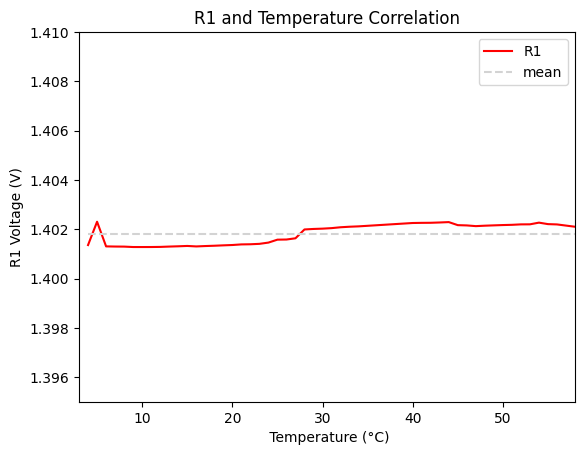

In [150]:
# R1_C = np.around(coef(tmp,R1),3)
# w=polynomial(tmp,R1,3) #n次方多項式
# x_temp=np.linspace(0,80,100)
# plt.plot(x_temp,func(x_temp,w),'b',label=f'r = {R1_C}') 
# # plt.plot(tmp,R1,'b',label=f'r = {R1_C}')
# plt.legend() 
# plt.scatter(tmp,R1,s=1)
# plt.scatter(temperature,R1_avg,s=2)


R1_C = np.around(coef(temR1_filter,R1_filter),3)

print(f'r = {R1_C}')
# plt.plot(temR1_filter,R1_filter, 'r')
# plt.scatter(temR1_filter,R1_filter,s=2,label=f'R1 Voltage')
plt.plot(temR1_filter,R1_filter, 'r', label=f'R1')
# plt.plot(temR1_filter, np.full(len(temR1_filter), R1_max), 'lightgray', linestyle="--", label=f'3σ, -3σ')
# plt.plot(temR1_filter, np.full(len(temR1_filter), R1_min), 'lightgray', linestyle="--")
plt.plot(temR1_filter, np.full(len(temR1_filter), np.mean(R1_avg)), 'lightgray', linestyle="--", label=f'mean')
plt.legend() 

plt.xlabel(" Temperature (°C)")
plt.ylabel("R1 Voltage (V)")
plt.title(f'R1 and Temperature Correlation') 
plt.axis([3, 58, 1.395,1.41])

r = -0.485


(3.0, 60.0, 1.34, 1.37)

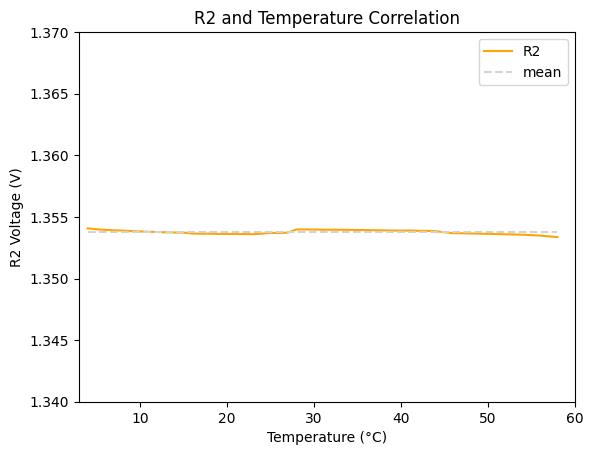

In [151]:
# R2_C = np.around(coef(tmp,R2),3)
# w=polynomial(tmp,R2,3) #n次方多項式
# x_temp=np.linspace(0,80,100)
# plt.plot(x_temp,func(x_temp,w),'g',label=f'r = {R2_C}')
# # plt.plot(tmp,R2,'g',label=f'r = {R2_C}')
# plt.legend() 
# plt.scatter(tmp,R2,s=1,c ='g')
# plt.plot(temperature,R2_avg,'g-')

R2_C = np.around(coef(temR2_filter,R2_filter),3)
# w=polynomial(temperature,R2_avg,3) #n次方多項式
# x_temp=np.linspace(0,80,100)
# plt.plot(x_temp,func(x_temp,w),'g',label=f'r = {R2_C}')
print(f'r = {R2_C}')
# plt.scatter(temR2_filter,R2_filter,s=1,c ='g',label=f'R2 Voltage')
plt.plot(temR2_filter,R2_filter, 'orange',label=f'R2')
# plt.plot(temR1_filter, np.full(len(temR2_filter), R2_max), 'gray', linestyle="--", label=f'3σ')
# plt.plot(temR1_filter, np.full(len(temR2_filter), R2_min), 'gray', linestyle="--", label=f'-3σ')
plt.plot(temR1_filter, np.full(len(temR2_filter), np.mean(R2_avg)), 'lightgray', linestyle="--", label=f'mean')
plt.legend()
plt.xlabel("Temperature (°C)")
plt.ylabel("R2 Voltage (V)")
plt.title(f'R2 and Temperature Correlation') 
# plt.axis([3, 60, 1.352,1.356])
plt.axis([3, 60, 1.34,1.37])

(3.0, 60.0, 1.33, 1.42)

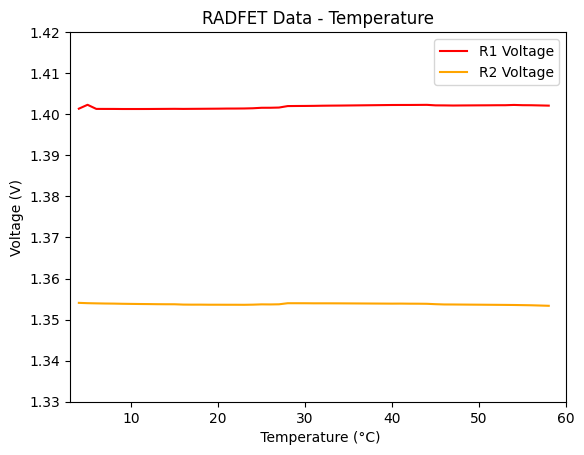

In [149]:
plt.plot(temperature,R1_avg, 'r', label=f'R1 Voltage')
plt.plot(temperature,R2_avg,'orange',label=f'R2 Voltage')
plt.legend() 

plt.xlabel(" Temperature (°C)")
plt.ylabel("Voltage (V)")
plt.title(f'RADFET Data - Temperature') 
plt.axis([3, 60, 1.33,1.42])